In [1]:
import numpy as np
from scipy.integrate import odeint
from pylab import *

def derivs(var,t):
    k  = 6.0
    m  = 1.0
    F1 = np.cos(2*t)
    
    x1 = var[0]
    v1 = var[1]
    
    x2 = var[2]
    v2 = var[3]
    
    x3 = var[4]
    v3 = var[5]

    dxdt1 = v1
    dxdt2 = v2
    dxdt3 = v3
    
    dvdt1 = (k * (x2-x1) + F1)/m
    dvdt2 = (k/m) * ((x3-x2) + (x1-x2))
    dvdt3 = (k/m) * (x2-x3)
    
    return np.array([dxdt1, dvdt1, dxdt2, dvdt2, dxdt3, dvdt3])

In [2]:
def RK4(f,init,t):

    N = len(t)
    Nvar = len(init)
    
    h = t[1]-t[0]

    r = np.zeros([N,Nvar])
    r[0,:] = init

    for i in range(N-1):
        k1 = h*f(r[i,:],t[i])
        k2 = h*f(r[i,:]+k1/2,t[i]+h/2)
        k3 = h*f(r[i,:]+k2/2,t[i]+h/2)
        k4 = h*f(r[i,:]+k3,t[i]+h)
        r[i+1,:] = r[i,:] + (k1+2*k2+2*k3+k4)/6.0

    return r

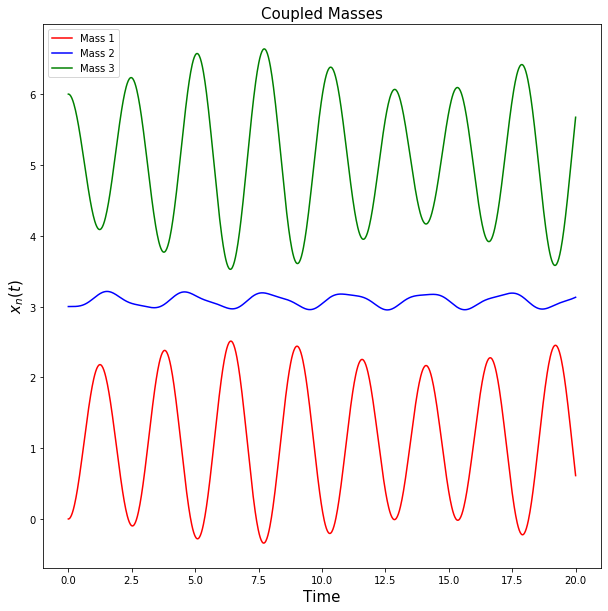

In [6]:
t = np.linspace(0,20,1000)

init = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0]) #Setting Initial Conditions to 0
 
Coupled = RK4(derivs, init, t)

x1 = Coupled[:,0]
x2 = Coupled[:,2] + 3
x3 = Coupled[:,4] + 6


fig1 = plt.figure(figsize=(10,10));
plt.title('Coupled Masses', fontsize=15)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('$x_n(t)$', fontsize = 15)

plot(t, x1, color = 'red',label='Mass 1')
plot(t, x2, color ='blue', label='Mass 2')
plot(t, x3, color = 'green', label='Mass 3')
legend() #The graph below is the motion due to only the driving force F1